# Surprise Housing Prediction

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. 

Our goal is to build a regression model using regularisation in order to predict the actual value of the prospective properties.
 
As a result of this task the company wants to know:
Which variables are significant in predicting the price of a house, and
How well those variables describe the price of a house.
 
The solution is divided into the following sections: 
- Data understanding and exploration
- Data cleaning
- Data preparation
- Model building and evaluation



## I. Preparation

### 1. Importing libraries used for the exercise

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### 2. Setting general parameters for data visualization 

In [2]:
# Setting the font size and figure size for all plots 
sns.set(font_scale=1.3, rc={'figure.figsize':(11.7,8.27)})

### 3. Reading the dataset 

The current analysis uses one dataset that we read from the 'train.csv'. The 'train.csv' has the following fields:


MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density
	
LotFrontage: Linear feet of street connected to property

LotArea: Lot size in square feet

Street: Type of road access to property

       Grvl	Gravel	
       Pave	Paved
       	
Alley: Type of alley access to property

       Grvl	Gravel
       Pave	Paved
       NA 	No alley access
		
LotShape: General shape of property

       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular
       
LandContour: Flatness of the property

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
Utilities: Type of utilities available
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
LotConfig: Lot configuration

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property
	
LandSlope: Slope of property
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope
	
Neighborhood: Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
Condition1: Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
BldgType: Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
	
HouseStyle: Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level
	
OverallQual: Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor
	
OverallCond: Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
		
YearBuilt: Original construction date

YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)

RoofStyle: Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed
		
RoofMatl: Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles
		
Exterior1st: Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: Exterior covering on house (if more than one material)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
MasVnrType: Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone
	
MasVnrArea: Masonry veneer area in square feet

ExterQual: Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
ExterCond: Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Foundation: Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
BsmtQual: Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement
		
BsmtCond: Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement
	
BsmtExposure: Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement
	
BsmtFinType1: Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement
		
BsmtFinSF1: Type 1 finished square feet

BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

BsmtFinSF2: Type 2 finished square feet

BsmtUnfSF: Unfinished square feet of basement area

TotalBsmtSF: Total square feet of basement area

Heating: Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
CentralAir: Central air conditioning

       N	No
       Y	Yes
		
Electrical: Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
		
1stFlrSF: First Floor square feet
 
2ndFlrSF: Second floor square feet

LowQualFinSF: Low quality finished square feet (all floors)

GrLivArea: Above grade (ground) living area square feet

BsmtFullBath: Basement full bathrooms

BsmtHalfBath: Basement half bathrooms

FullBath: Full bathrooms above grade

HalfBath: Half baths above grade

Bedroom: Bedrooms above grade (does NOT include basement bedrooms)

Kitchen: Kitchens above grade

KitchenQual: Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       	
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

Functional: Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
Fireplaces: Number of fireplaces

FireplaceQu: Fireplace quality

       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace
		
GarageType: Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage
		
GarageYrBlt: Year garage was built
		
GarageFinish: Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
		
GarageCars: Size of garage in car capacity

GarageArea: Size of garage in square feet

GarageQual: Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
GarageCond: Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage
		
PavedDrive: Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel
		
WoodDeckSF: Wood deck area in square feet

OpenPorchSF: Open porch area in square feet

EnclosedPorch: Enclosed porch area in square feet

3SsnPorch: Three season porch area in square feet

ScreenPorch: Screen porch area in square feet

PoolArea: Pool area in square feet

PoolQC: Pool quality
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		
Fence: Fence quality
		
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
	
MiscFeature: Miscellaneous feature not covered in other categories
		
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None
		
MiscVal: $Value of miscellaneous feature

MoSold: Month Sold (MM)

YrSold: Year Sold (YYYY)

SaleType: Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
		
SaleCondition: Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)


In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


## II. EDA, data cleansing, data preparation

In [6]:
# General info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Remark

We have only 1460 records. It is not too much. We have to make sure that we save as much as possible during data preparation as by dropping to many rows we might lose significant amount of information

### II/1. Handling Missing data

It is clear from the information above that there are lots of missing values. Let's treat them first

###### Searching for columns with missing information

In [7]:
#columns with missing information 
df.isnull().sum()[df.isnull().any()].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

###### Removing the ones with more than 1000 missing values out of the 1460 records

Features with more than 2/3 of the values missing will be deleted. 

In [8]:
#checking the values before deleting the features
lots_of_missing = df.isnull().sum()[df.isnull().sum()>1000].index.tolist()
for c in lots_of_missing:
    print(c)
    print(df[c].value_counts())
    print('')

Alley
Grvl    50
Pave    41
Name: Alley, dtype: int64

PoolQC
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

Fence
MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

MiscFeature
Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64



In [9]:
# these columns can be dropped
df.drop(lots_of_missing, axis=1, inplace=True)

###### Checking the remaining columns with missing values one-by-one. 
Columns with lower number of missing values will be verified one-by-one to understand the reason behind the data quality problem. 

In [10]:
# Columns to check
df.isnull().sum()[df.isnull().any()].sort_values(ascending=False)

FireplaceQu     690
LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageFinish     81
GarageQual       81
GarageCond       81
BsmtExposure     38
BsmtFinType2     38
BsmtQual         37
BsmtCond         37
BsmtFinType1     37
MasVnrType        8
MasVnrArea        8
Electrical        1
dtype: int64

##### FireplaceQu

In [11]:
df.Fireplaces.value_counts()

0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

###### Remark:
There are exactly 690 records with 0 fireplaces in the dataset. It means that in case of FireplaceQu we do not really deal with missing data but rather properties with no fireplace.

Instead of deleting the column, we **fill the missing values** with the string 'NA'

In [12]:
df.FireplaceQu.fillna('NA', inplace=True)

###### GarageType

In [13]:
df.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

###### Remark:
'No garage' category is not present in the data. Based on this fact plus based on the data dictionary it is fair to assume that the 81 missing cases are not 'missing data' cases but rather real estates with 'no garage'.  

Instead of deleting the column, we **fill the missing values** with the string 'Year Built' value of the real estate. It is a good approximation as it is fair to assume that most of the garages were built around the time the entire house was built. 

In [14]:
df[df.GarageYrBlt == 1900].YearBuilt

93    1910
Name: YearBuilt, dtype: int64

In [15]:
df.GarageYrBlt.fillna(df.YearBuilt, inplace=True)

##### If there is no garage, the remaining 'garage related' columns should also be filled with 'NA'

In [16]:
df.fillna({'GarageType': 'NA', 'GarageFinish':'NA', 'GarageQual':'NA', 'GarageCond':'NA'}, inplace=True)

In [17]:
a = int(df.LotFrontage.mode())
df.LotFrontage.fillna(a, inplace=True)

##### Remaining features
The remaining features will be handled by injecting the mode value 

In [18]:
remaining_missing = list(df.isnull().sum()[df.isnull().any()].sort_values(ascending = False).index)
remaining_missing

['BsmtExposure',
 'BsmtFinType2',
 'BsmtQual',
 'BsmtCond',
 'BsmtFinType1',
 'MasVnrType',
 'MasVnrArea',
 'Electrical']

In [19]:
for i in remaining_missing:
    df['{}'.format(i)].fillna(df['{}'.format(i)].mode()[0], inplace=True)

### II/2. Outlier detection
The analysis will be done for the numeric and non-numeric variables separatelly.  

In [20]:
numeric = list(df.dtypes[df.dtypes != 'object'].index)
non_num = list(df.dtypes[df.dtypes == 'object'].index)

#### Outlier detection

In [21]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

print('upper')
for i in numeric:
    if df[i][(df[i] > (q3[i] + 4*iqr[i]))].count()>0:
        print(i)
        print(len(df[i][(df[i] > (q3[i] + 4*iqr[i]))]))
print('lower')
for i in numeric:
    if df[i][(df[i] < (q1[i] - 4*iqr[i]))].count()>0:
        print(i)
        print(df[i][(df[i] < (q1[i] - 4*iqr[i]))])

upper
LotFrontage
7
LotArea
24
MasVnrArea
13
BsmtFinSF1
1
BsmtFinSF2
167
TotalBsmtSF
1
1stFlrSF
1
LowQualFinSF
26
GrLivArea
3
BsmtHalfBath
82
BedroomAbvGr
1
KitchenAbvGr
67
WoodDeckSF
1
OpenPorchSF
7
EnclosedPorch
208
3SsnPorch
24
ScreenPorch
116
PoolArea
7
MiscVal
52
SalePrice
7
lower
KitchenAbvGr
954    0
Name: KitchenAbvGr, dtype: int64


##### Remark

The traditional method even using - 4 IQR -  would simply delete too many records. So deleting the outliers using the "traditional" method is not recommended as we might loose too much information. We are going to check the plots and look at them visually

#### Note:
- No missing informaition at this point.
- Outliers are not yet treated. 

### II/3. Visualizing the data

#### II/3.1 Numeric variables

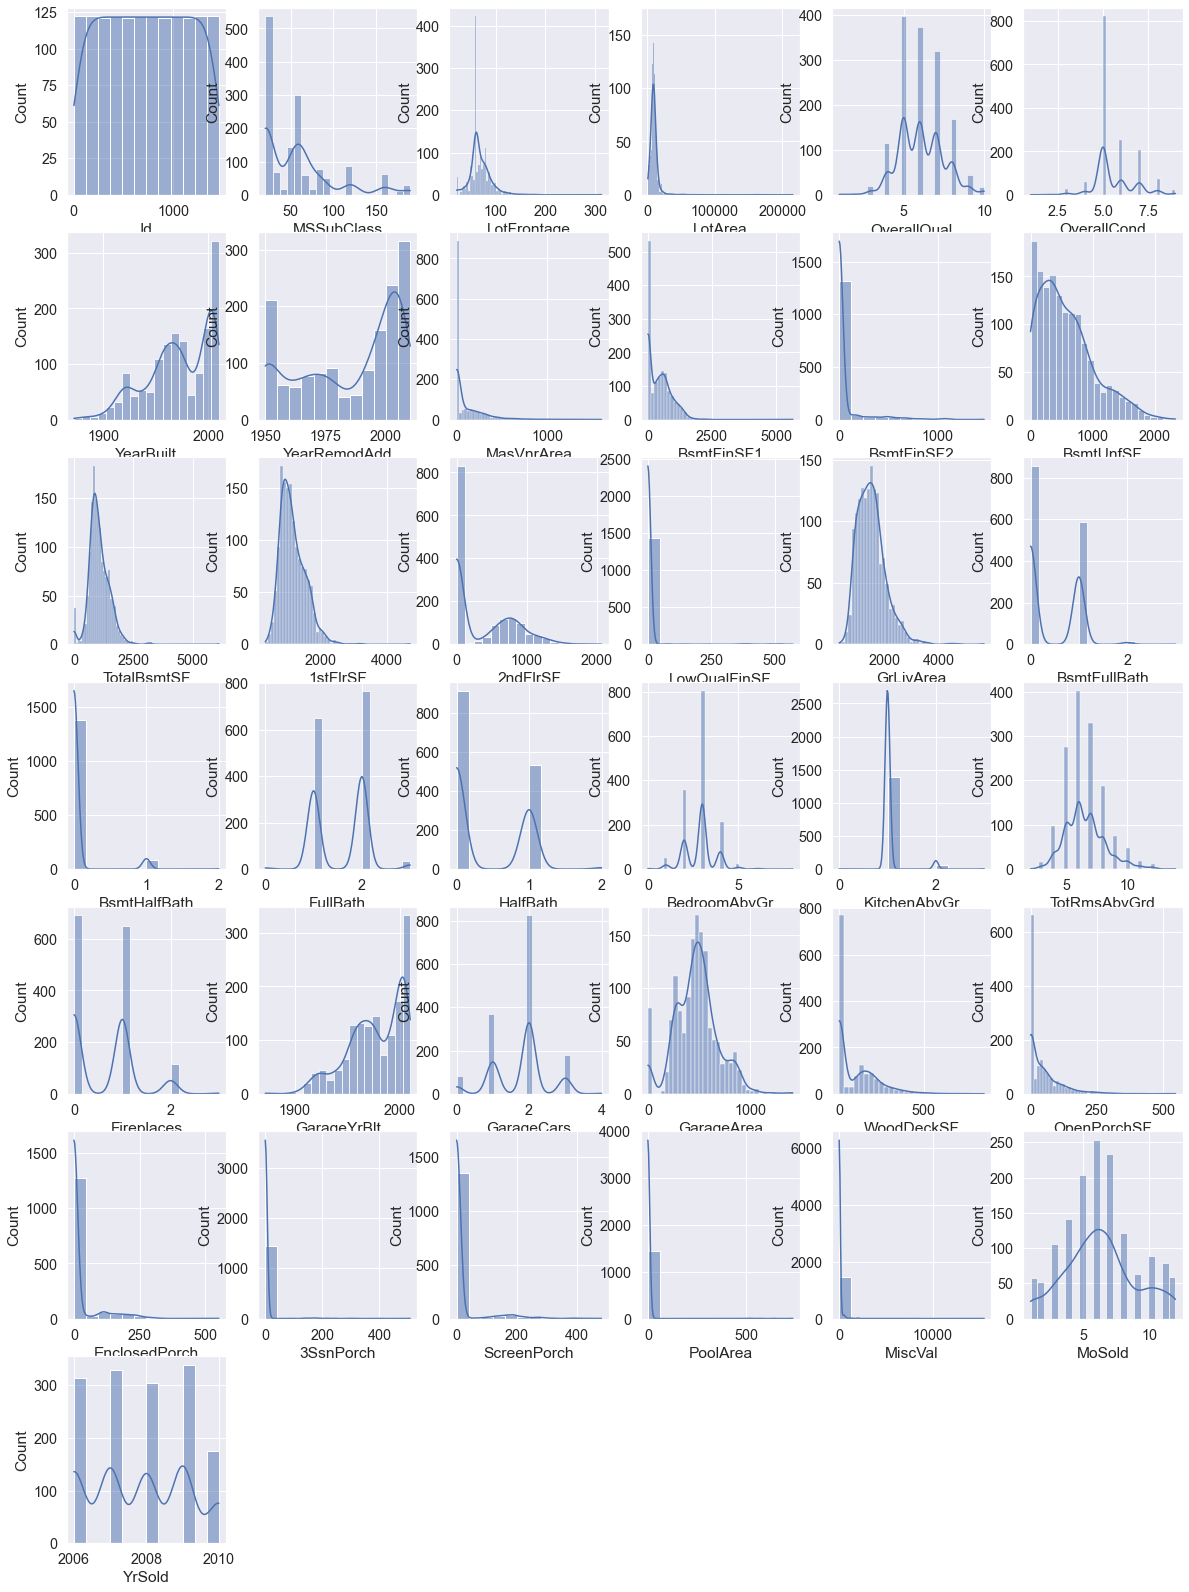

In [22]:
features = numeric.copy()
features.remove('SalePrice')

plt.figure(figsize=(20, 82))

for i in range(len(features)):
    plt.subplot(20,6,i+1)
    sns.histplot(df[features[i]], kde=True)
plt.show()


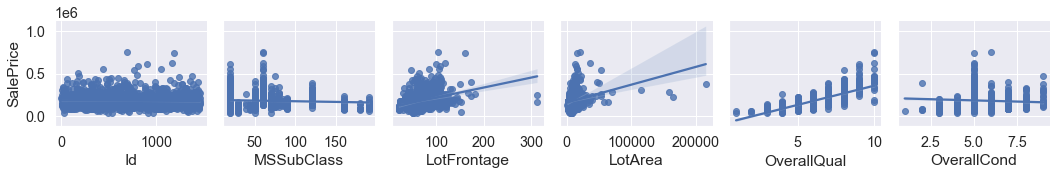

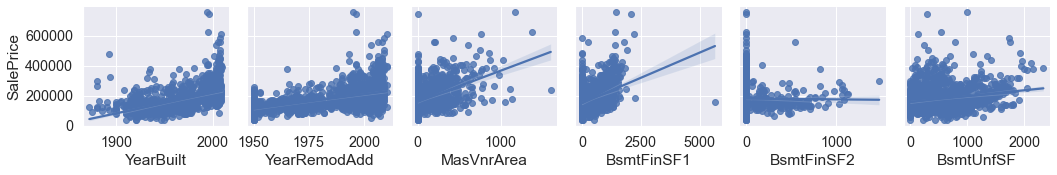

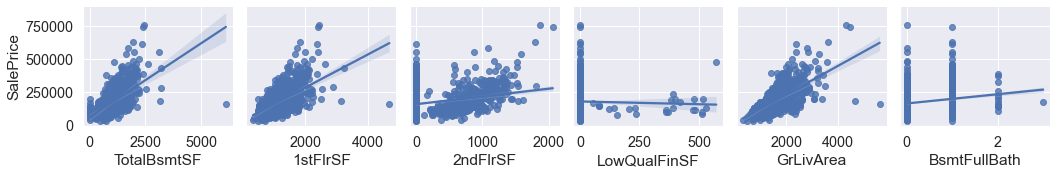

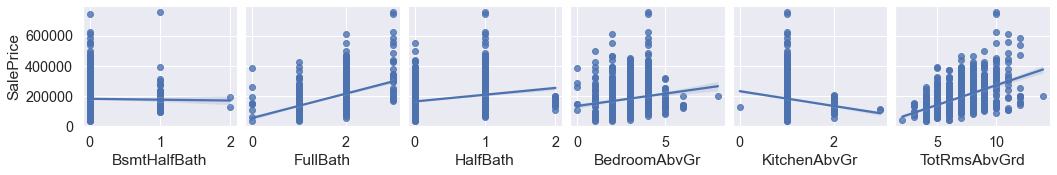

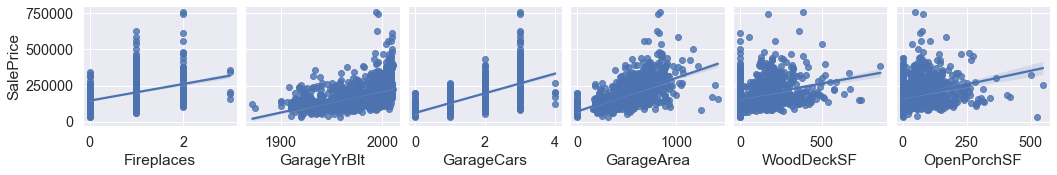

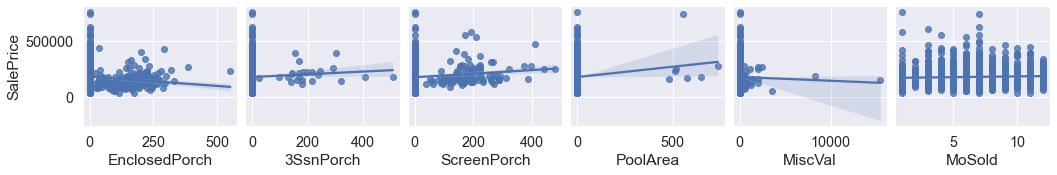

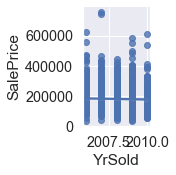

In [23]:
features = numeric.copy()
features.remove('SalePrice')
for i in range(0, len(features), 6):
     sns.pairplot(data=df, x_vars=features[i:i+6], y_vars='SalePrice', kind='reg')

#### Note:
- The ID is really random, to be deleted.
- MiscVal, PoolArea, LowQualFinSF seem to have value 0 for the majority of the records. To be checked!
- There seem to be a large real estate that distorts lots of variables (TotalBsmtSF, 1stFlrSF etc.) has to be checked
- For LotArea there seem to be 4 records with extreme values. To be checked!


In [24]:
# The values to be deleted will be stored here
to_be_deleted = []
to_be_deleted.append('Id')

#### Deleting the features with no variation
There are lots of plots where majority of the points have the value 0 and only few records take the value different from 0. These features are not useful for us as there is no variation in the data. Lets collect those where the most frequent value is taken more than 95% of the cases!

In [25]:
most_freq_value = df[numeric].apply(lambda x: x.value_counts().max())
most_freq_value[most_freq_value>df.shape[0]*0.95]

LowQualFinSF    1434
KitchenAbvGr    1392
3SsnPorch       1436
PoolArea        1453
MiscVal         1408
dtype: int64

In [26]:
#Let's add these to the list of columns to be deleted
to_be_deleted += list(most_freq_value[most_freq_value>df.shape[0]*0.95].index)

#### Deleting outliers identified visually

In [27]:
# There is one extreme value in TotalBsmtSF that has to be removed
df=df[~(df['TotalBsmtSF'] == df['TotalBsmtSF'].max())]

In [28]:
# The LotAreas above 100000 has to be removed as those clearly distort the overall 
df=df[(df['LotArea'] < 60000)]

In [29]:
# LotFrontage cases above 160 to be removed
df=df[(df['LotFrontage'] <= 160)]

In [30]:
# Dropping the features previously selected
df = df.drop(columns=to_be_deleted)

In [31]:
features = [col for col in features if col not in to_be_deleted]

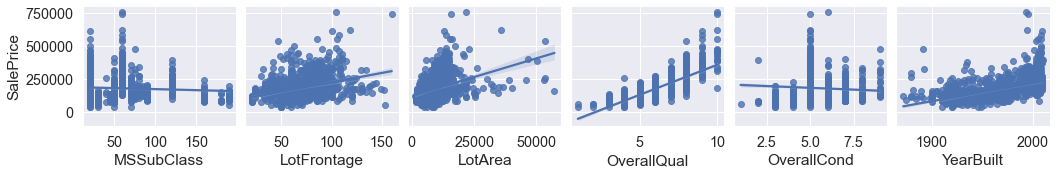

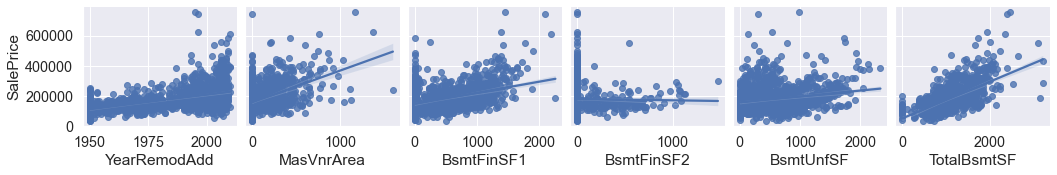

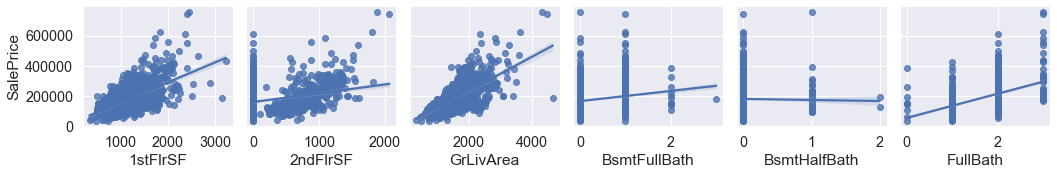

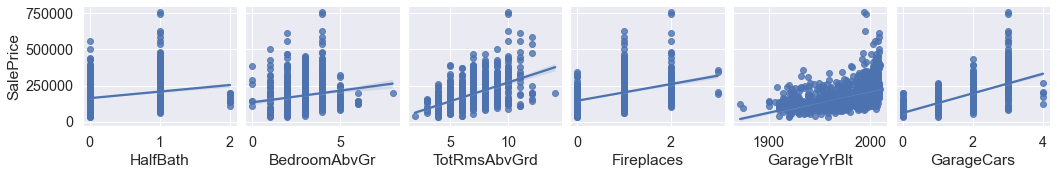

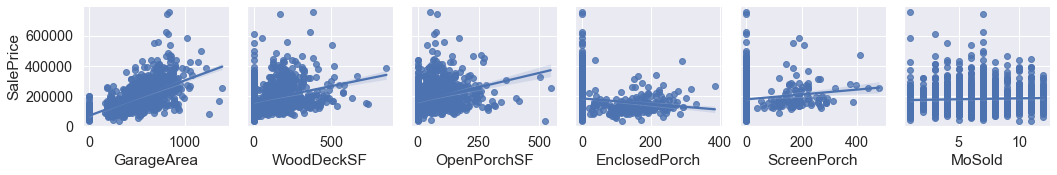

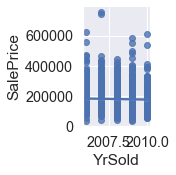

In [32]:
for i in range(0, len(features), 6):
     sns.pairplot(data=df, x_vars=features[i:i+6], y_vars='SalePrice', kind='reg')

#### II/3.1 Category variables

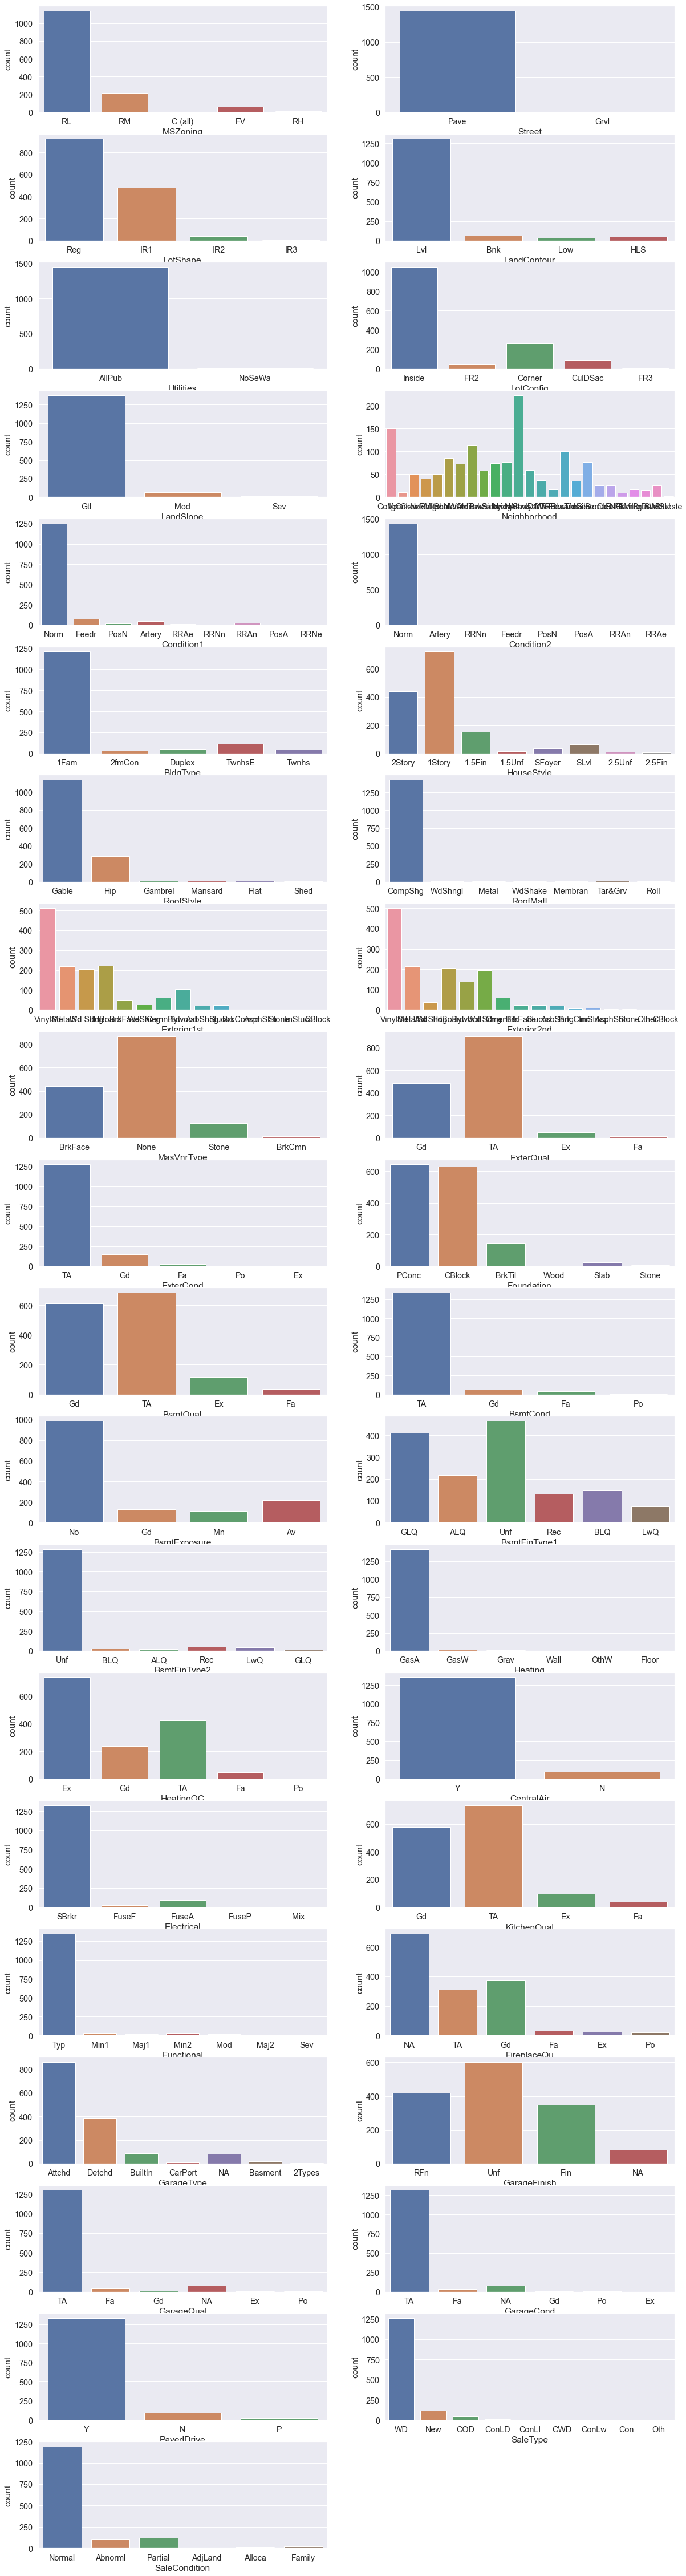

In [33]:
# category variables
category = non_num

# univariate analysis
plt.figure(figsize=(20, 82))

for i, c in enumerate(category):
    plt.subplot(20,2,i+1)
    sns.countplot(data=df, x=c)
plt.show()

#### Remark

There are some features with no real variance inside (almost all records are taking the same value). To be handled later!

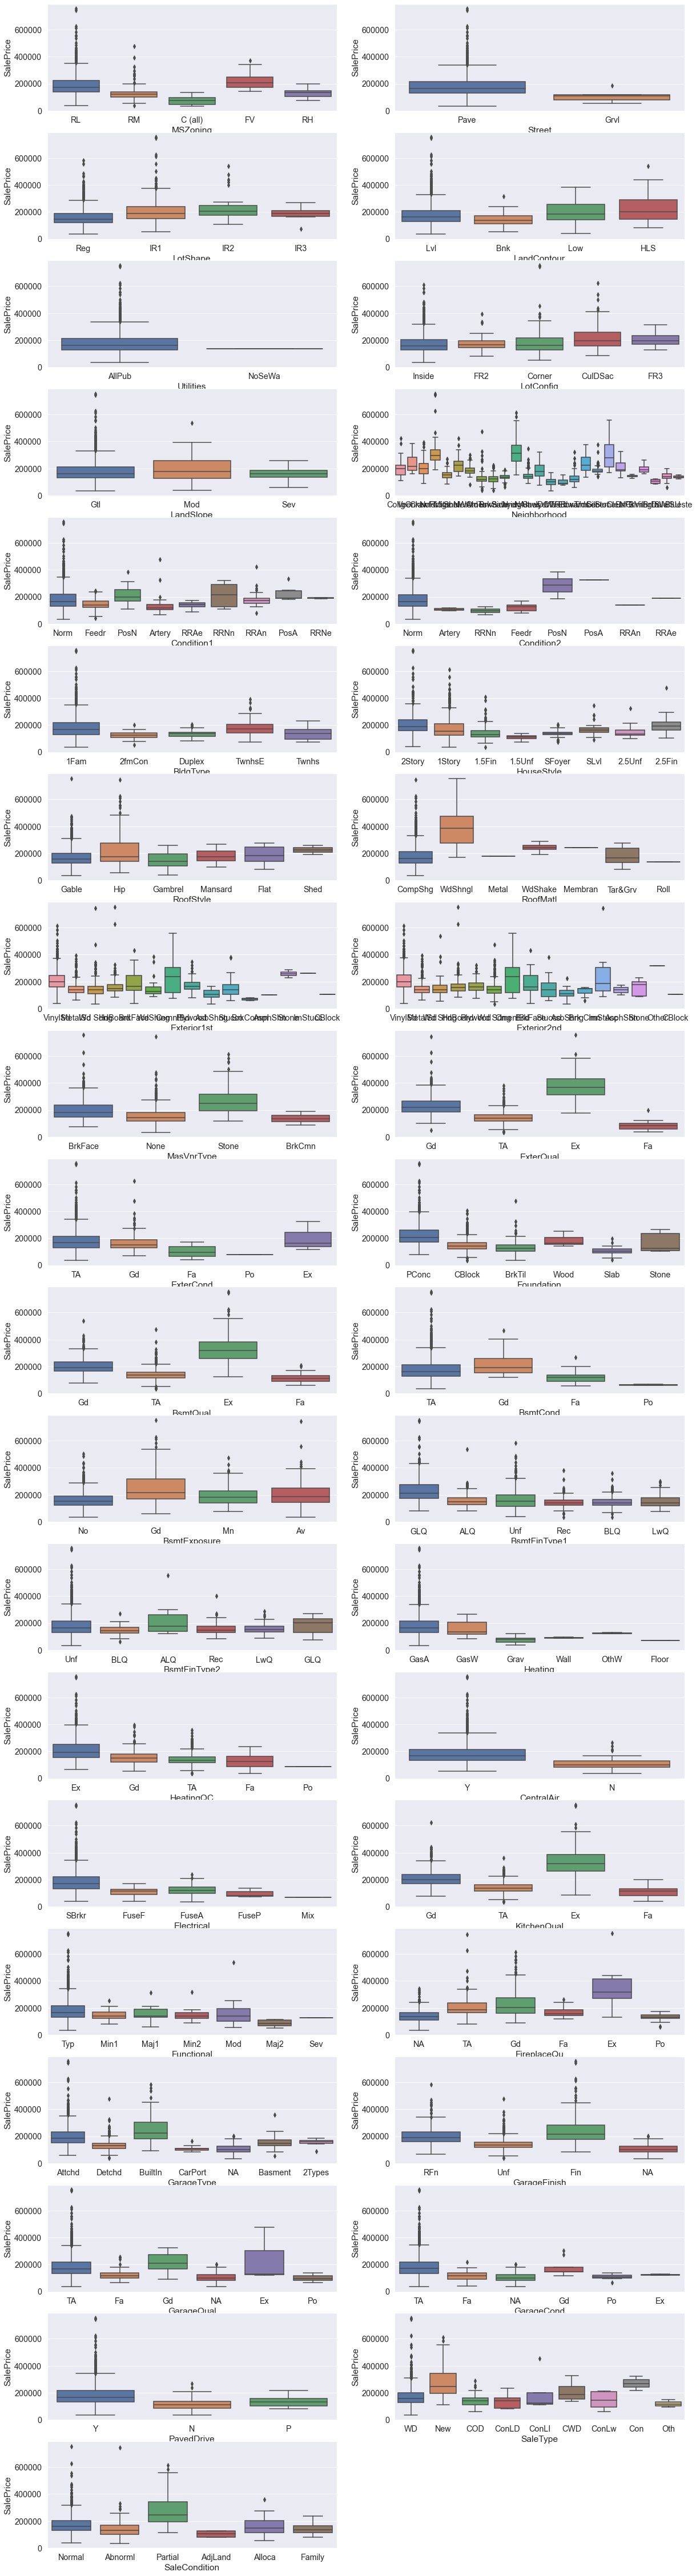

In [34]:
# category variables
category = non_num

# plotting the correlation
plt.figure(figsize=(20, 82))

for i, c in enumerate(category):
    plt.subplot(20,2,i+1)
    sns.boxplot(data=df, x=c, y='SalePrice')
plt.show()

#### Deleting features with no variation

In [35]:
#Selecting features with more than 95% of records taking the same value (high concentration)
most_freq_value = df.apply(lambda x: x.value_counts().max())
most_freq_value[most_freq_value>df.shape[0]*0.95]

Street        1444
Utilities     1448
LandSlope     1377
Condition2    1434
RoofMatl      1426
Heating       1418
dtype: int64

In [36]:
#Collecting the columns to be deleted
to_be_deleted = list(most_freq_value[most_freq_value>df.shape[0]*0.95].index)
to_be_deleted

['Street', 'Utilities', 'LandSlope', 'Condition2', 'RoofMatl', 'Heating']

In [37]:
#Deleting the columns
df = df.drop(columns=to_be_deleted)

#### Creating dummy variables
There are lots of category variables with lots of dimensions. As we only have ~1400 records the '**curse of dimensionality**' is upon us.  

In order to reduce the impact of dummy variables on the number of dimensions, we will treat the ordinal variables differently.
There are features with clear order among the dimensions. For these cases Ordinal encoding will be used instead of one-hot encoding. 
For features with no order among the dimensions one-hot encoding will be used. 

In [38]:
ordinal = ['ExterQual', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
                'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual', 
                'GarageFinish', 'GarageQual', 'GarageCond', 'ExterCond', 'LotShape', 'FireplaceQu']

In [39]:
# To make sure that the numbers represent the real-life order from worse to best, the numbers will be
# assigned manually. This is a tedious task but this way we can represent the true order

to_replace = { 
    'ExterQual' : {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4},
    'BsmtQual' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtCond' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'BsmtExposure' : {'NA': 0, 'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4},
    'BsmtFinType1' : {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'BsmtFinType2' : {'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6},
    'HeatingQC' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'KitchenQual' : {'Po': 0, 'Fa': 1, 'TA': 2,'Gd': 3, 'Ex': 4},
    'GarageFinish' : {'NA':0, 'Unf': 1, 'RFn': 2, 'Fin':3},
    'GarageQual' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'GarageCond' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5},
    'ExterCond' : {'Po': 0, 'Fa': 1, 'TA': 2,'Gd': 3, 'Ex': 4},
    'LotShape' : {'IR1': 0, 'IR2': 1, 'IR3': 2, 'Reg': 3},
    'FireplaceQu' : {'NA': 0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
}

In [40]:
# Replacing categories with numbers
for i in ordinal:
    df['{}'.format(i)] = df['{}'.format(i)].replace(to_replace[i])

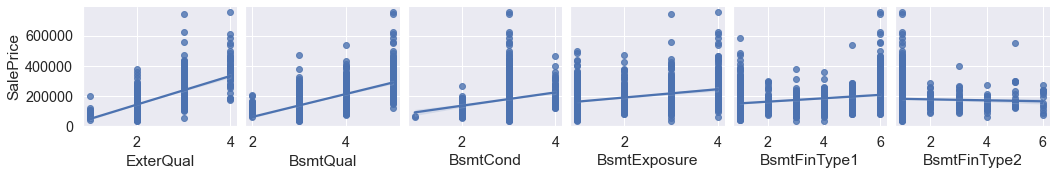

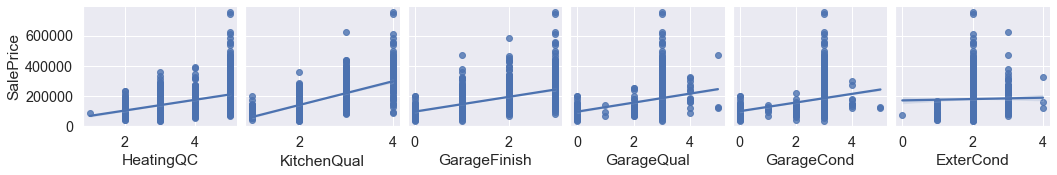

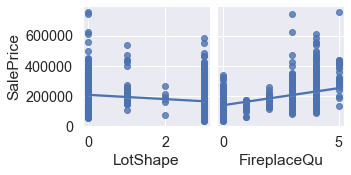

In [41]:
# Plotting the relationship of the ordinal variables with the feature variable
for i in range(0, len(ordinal), 6):
     sns.pairplot(data=df, x_vars=ordinal[i:i+6], y_vars='SalePrice', kind='reg')

#### One-Hot encoding

In [42]:
unordered = ['MSZoning','LandContour','LotConfig','Neighborhood','Condition1','BldgType',
             'HouseStyle','RoofStyle','Exterior1st', 'CentralAir', 'Exterior2nd','MasVnrType','Foundation',
             'Electrical','Functional','GarageType','PavedDrive','SaleType','SaleCondition']
dummy_cols = pd.get_dummies(df[unordered], drop_first = True)
df = pd.concat([df, dummy_cols], axis = 1)
df.drop(unordered, axis = 1, inplace = True)

### II/3 Feature engineering

Changing the years into 'age'

In [43]:
df['YearBuilt'] = 2021 - df['YearBuilt']
df['YrSold'] = 2021 - df['YrSold']
df['GarageYrBlt'] = 2021 - df['GarageYrBlt']
df['YearRemodAdd'] = 2021 - df['YearRemodAdd']

## III. Model building

### III/1 Preparation

#### Splitting the dataset into train and test

In [44]:
from sklearn.model_selection import train_test_split

X=df.drop(['SalePrice'], axis=1)
y = df.SalePrice

train, test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
df.shape

(1449, 174)

#### Scaling the variables 

At this point all of the values in the dataset are numeric. As we use MinMax scaling we wanna skip dummy variables.
The scaling is done after the train/test split, fitted on the train set only!

In [46]:
#Checking if all dtypes are indeed numeric
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1449 entries, 0 to 1459
Columns: 174 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(43), uint8(128)
memory usage: 745.5 KB


In [47]:
# Checking if the list of features with 2 values (dummies) and the list of features where
# the max. value is 1 matches. The dummy features won't be scaled!
list1 = [i for i in list(df.columns) if len(df[i].value_counts())==2]
list2 = [i for i in list(df.columns) if df[i].max()==1]
print(list1 == list2)
print(len(list1))

True
128


In [48]:
#Scaling the variables using the train set only!
scaler = MinMaxScaler()
to_scale = df.drop(list1, axis=1).columns
train[to_scale] = scaler.fit_transform(train[to_scale])

#### Creating datasets for the features and for the target

In [49]:
y_train = train.pop('SalePrice')
X_train = train

#We keep the orignal scaled X_train set for later use
X_train_scaled = X_train.copy()

### III/2. Model building

### 2.1 Linear regression with automated/manual feature selection

Even though it is not part of the assignment, in order to have a 'baseline model' I start with a linear regression model with no regularization. As we have plenty of features in the dataset we have to reduce the number of features first. 
I start with automated RFE that will be followed by manual feature elimination.

#### 2.1.1 Automated feature selection

As we have plenty of features to select from, and manual feature selection can be tedious, this notebook follows a mixed approach. As a first step we select the best potential 20 features automatically using Recursive Feature Elminiation. The 20 best features will be dealt with manually later on. 

In [50]:
# Fitting a LinearRegression model from sklearn package for RFE
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [51]:
# Creating test sets for later use
y_test = test['SalePrice']
X_test = test.drop('SalePrice', axis=1)

In [52]:
# Fitting the RFE for determining the best 20 features
rfe = RFE(estimator=lin_reg, n_features_to_select=20)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=20)

In [53]:
# Displaying the feature ranks
sorted(list(zip(X_train.columns,rfe.support_, rfe.ranking_)), key= lambda x: x[2])

[('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('BsmtQual', True, 1),
 ('BsmtFinSF1', True, 1),
 ('TotalBsmtSF', True, 1),
 ('GrLivArea', True, 1),
 ('KitchenQual', True, 1),
 ('GarageArea', True, 1),
 ('GarageQual', True, 1),
 ('GarageCond', True, 1),
 ('LotConfig_FR3', True, 1),
 ('Neighborhood_NoRidge', True, 1),
 ('Neighborhood_NridgHt', True, 1),
 ('Neighborhood_StoneBr', True, 1),
 ('Functional_Sev', True, 1),
 ('SaleType_Con', True, 1),
 ('SaleType_New', True, 1),
 ('SaleCondition_Partial', True, 1),
 ('Condition1_RRAe', False, 2),
 ('Exterior2nd_ImStucc', False, 3),
 ('Foundation_Stone', False, 4),
 ('ScreenPorch', False, 5),
 ('Exterior2nd_Other', False, 6),
 ('TotRmsAbvGrd', False, 7),
 ('BedroomAbvGr', False, 8),
 ('MSSubClass', False, 9),
 ('MSZoning_FV', False, 10),
 ('MSZoning_RL', False, 11),
 ('MSZoning_RM', False, 12),
 ('MSZoning_RH', False, 13),
 ('GarageType_NA', False, 14),
 ('GarageType_BuiltIn', False, 15),


In [54]:
# Creating the train dataset for manual feature selection by keeping only the automatically selected 20 features
X_train = X_train.drop(X_train.columns[~rfe.support_].to_list(), axis=1)

#### 2.1.2 Manual feature selection
For the manual feature selection this notebook uses the statsmodel package as it provides wide range of statistics for analyzing model performance and for selecting features

In [55]:
# Add a constant
X_train_lm = sm.add_constant(X_train)

# As we are going to have multiple models, the models and corresponding datasets will be stored in dictionaries
my_models = {}
my_datasets = {}
my_datasets['working_copy'] = X_train_lm.copy()

In [56]:
# "letsremove" is a helper function for eliminating one feature (given as input) at a time
def letsremove(to_drop, data=X_train_lm):
    my_datasets['working_copy'].drop(to_drop, axis=1, inplace=True)
    
# "my_train" is a helper function for model building and evaluation. It:
# - stores the dataset used for modeling
# - It fits the model and stores the fitted model 
# - It prints out the OLS statistics and VIF
def my_train(ver):
    
    my_datasets['X_train_{vers}'.format(vers=ver)] = my_datasets['working_copy'].copy()
    my_models['lr_{vers}'.format(vers=ver)] = sm.OLS(y_train, my_datasets['working_copy']).fit()
    print(my_models['lr_{vers}'.format(vers=ver)].summary())
    vif = pd.DataFrame()
    vif['Features'] = my_datasets['working_copy'].columns
    vif['VIF'] = [variance_inflation_factor(my_datasets['working_copy'].values, i) for i in range(my_datasets['working_copy'].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    print(vif)
    
def revert_to(ver):
    my_datasets['working_copy'] = my_datasets['X_train_{v}'.format(v=ver)].copy()

#### Modelling for manual feature elimination

#### Model 0 with the 20 features

In [57]:
my_train(0)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     321.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:21   Log-Likelihood:                 1828.0
No. Observations:                1014   AIC:                            -3614.
Df Residuals:                     993   BIC:                            -3511.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

This is a raw model with some high VIFs

#### Model 1
For Model 1 the 'SaleType_New' is removed as it clearly correlates with other variables and has extremely high VIF value

In [58]:
letsremove('SaleType_New')

In [59]:
my_train(1)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     333.2
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:21   Log-Likelihood:                 1821.4
No. Observations:                1014   AIC:                            -3603.
Df Residuals:                     994   BIC:                            -3504.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

Both R squared and Adjusted R squared remained practically the same. We got rid of the extremely high VIF-s as expected but we still have a high VIF value there and some of the coefficients might not be significant. 

#### Model 2
TotalBsmtSF has a high VIF. Lets remove it to see how the model changes.

In [60]:
letsremove('GarageQual')

In [61]:
my_train(2)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     351.2
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:21   Log-Likelihood:                 1820.3
No. Observations:                1014   AIC:                            -3603.
Df Residuals:                     995   BIC:                            -3509.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

We eliminated the painful multicollinearity at this point. Some of the coeffs however not significant. 

#### Model 3

Garage Condition's coeff is not significant

In [62]:
letsremove('GarageCond')

In [63]:
my_train(3)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     371.4
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:22   Log-Likelihood:                 1819.4
No. Observations:                1014   AIC:                            -3603.
Df Residuals:                     996   BIC:                            -3514.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

#### Model 4
LotConfig_FR3 coeff is not significant

In [64]:
letsremove('LotConfig_FR3')

In [65]:
my_train(4)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     393.7
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:22   Log-Likelihood:                 1817.9
No. Observations:                1014   AIC:                            -3602.
Df Residuals:                     997   BIC:                            -3518.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

#### Model 5
SaleType_Con's P value is below 0.05 but still high.

In [66]:
letsremove('SaleType_Con')

In [67]:
my_train(5)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     417.3
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:22   Log-Likelihood:                 1814.7
No. Observations:                1014   AIC:                            -3597.
Df Residuals:                     998   BIC:                            -3519.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

#### Model 6

In [68]:
letsremove('Functional_Sev')

In [69]:
my_train(6)

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     442.4
Date:                Sun, 03 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:35:22   Log-Likelihood:                 1809.7
No. Observations:                1014   AIC:                            -3589.
Df Residuals:                     999   BIC:                            -3516.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.09

This model seems to be solid enough for residual analysis

### 2.1.3 Residual analysis on train data

In [70]:
#This is a helper function for analysis of different models created previously
def residual_analysis(ver):

    X_train_int = my_datasets['X_train_{vers}'.format(vers=ver)].copy()
    
    y_train_pred = my_models['lr_{v}'.format(v=ver)].predict(X_train_int)
    print('R2 score of model {v} on the train set is:'.format(v=ver), r2_score(y_train, y_train_pred))
    

    new_df = X_train_int.copy()
    new_df['SalePrice'] = y_train
    
    for i in range(0, len(X_train_int.columns.to_list()), 6):
         sns.pairplot(data=new_df, x_vars=X_train_int.columns.tolist()[i:i+6], y_vars='SalePrice', kind='reg')
    
    plt.show()
    sns.histplot(y_train-y_train_pred, kde=True)
    plt.title('Distribution of error terms')
    plt.xlabel('Errors')
    plt.show()
    sns.regplot(x=y_train, y=y_train_pred)
    plt.title('y_train vs y_train_pred')
    plt.xlabel('Observed y')
    plt.ylabel('Predicted y')
    plt.show()
    sns.scatterplot(x=y_train, y=(y_train-y_train_pred))
    plt.title('Observed y vs Error terms')
    plt.ylabel('Error terms')
    plt.xlabel('Observed y')
    plt.show()
    sns.scatterplot(x=y_train.index, y=(y_train-y_train_pred))
    plt.title('Error terms vs observation order')
    plt.ylabel('Error terms')
    plt.xlabel('Observation order')
    plt.show()

R2 score of model 6 on the train set is: 0.8611134049244878


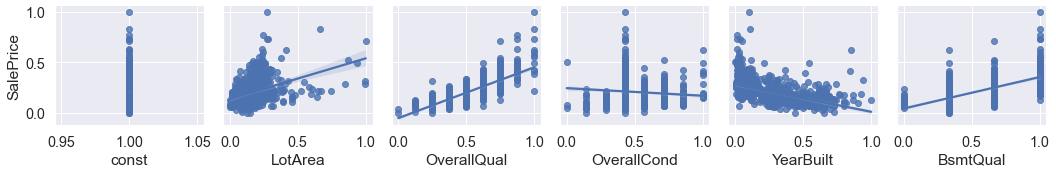

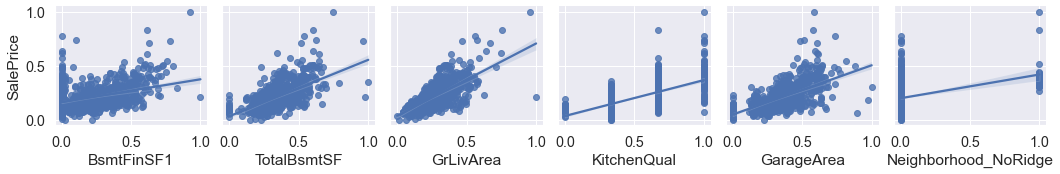

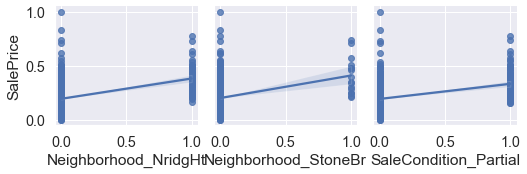

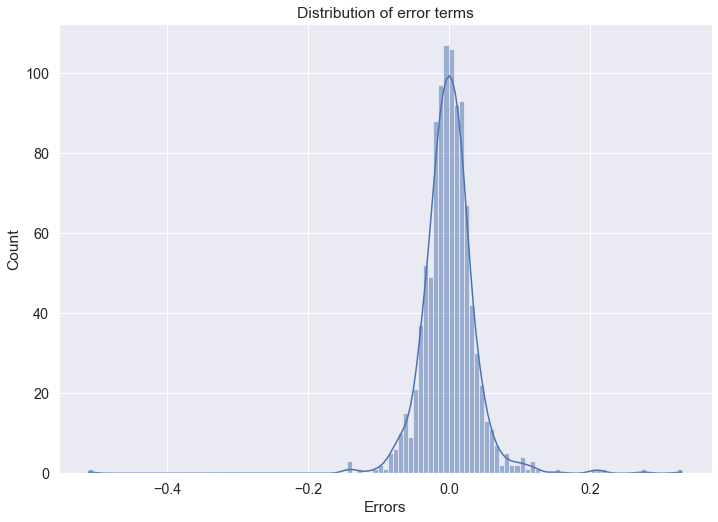

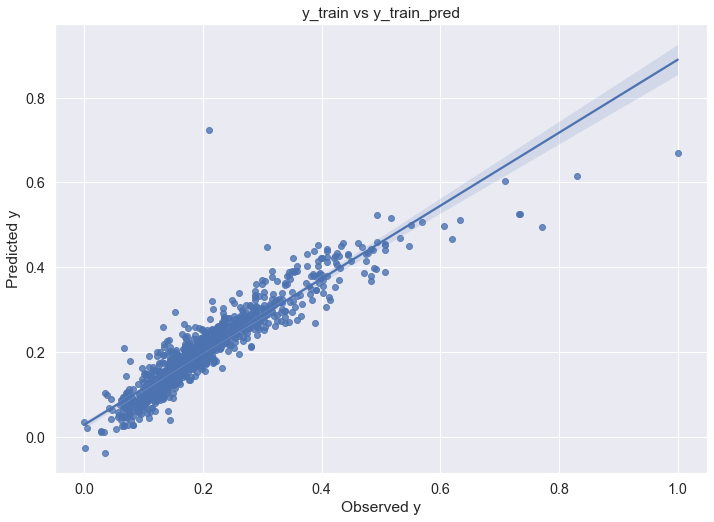

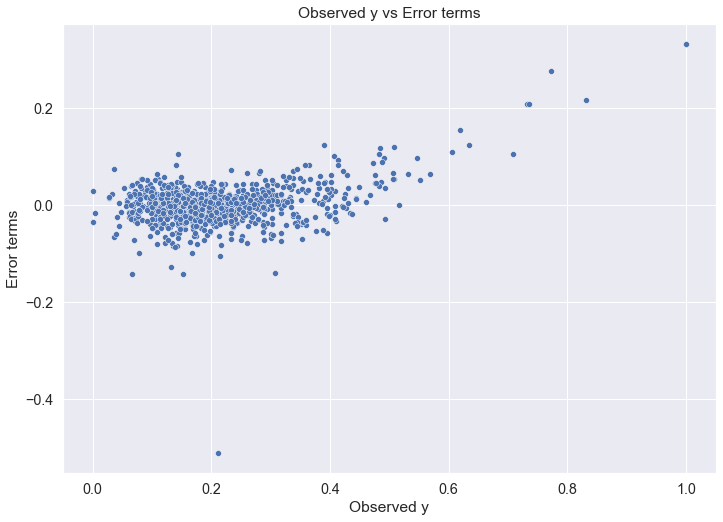

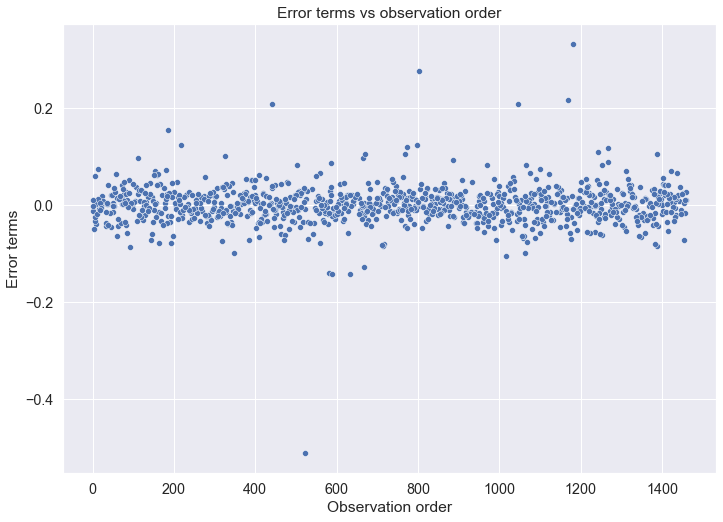

In [71]:
residual_analysis(6)

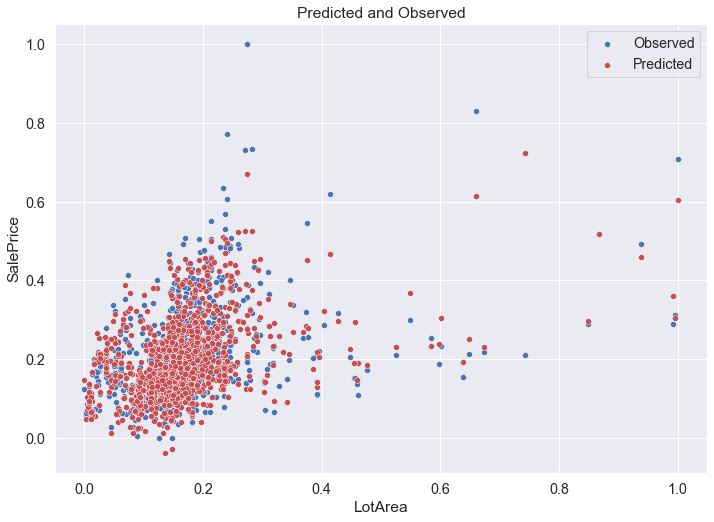

In [72]:
X_train_plot = my_datasets['X_train_6']
y_train_pred = my_models['lr_6'].predict(X_train_plot)


fig, ax = plt.subplots()
sns.scatterplot(x=X_train_plot.LotArea, y=y_train)
sns.scatterplot(x=X_train_plot.LotArea, y=y_train_pred, color='r')
ax.legend(['Observed', 'Predicted'])
plt.title('Predicted and Observed')
plt.show()

**Linear Relationship between X and y**

There is linear relationship (sometimes stronger, sometimes weaker) between X and y. However for the highest y values the model tends to underestimate the real value. 

**Distribution of error terms**

As it can be observed on the histogram above, the distribution of the error terms approaches normal around mean 0. It means that the "Normality" criteria of the error terms is fulfilled.

**Error terms are independent of eachother**

As it can be seen on the error terms vs. observation order plot, there is no real pattern. Error terms are independend of eachother

**Homoscedasticity**

Well, the variance of the error term is not quite constant (y vs error terms scatter). There is a bit higher variance of the error term for higher predicted values. Hence, we observe slight hetersocedasticity here. 

**Multicollinearity**

Looking at the VIF values we can say that no independent variable is a perfect linear combination of other independent variables

**Model fit**

The model is a good predictor of the target variable. The model managed to capture trends and shows no signs of overfitting.



So it all tells that the modell is quite decent, but far from perfect. There is a significant part in the variance that it can't explain. Anyhow, this is the best we have got, so let's see the performance on the test set!

### 2.1.4 Prediction using the LR model

#### Scaling the test set
We scale the test set by using the scaler that was fit on the training data

In [73]:
test[to_scale] = scaler.transform(test[to_scale])

#### Helper function
The train_test_evaluate helper function takes a fitted modell as an input. It calculates predictions using the fitted models, calculates and prints the different statistics and also returns those statistics

In [74]:
def train_test_evaluate(model):
    
    y_test = test['SalePrice']
    X_test = test[(X_train.columns.to_list())]


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    metric = []
    r2_train_lr = r2_score(y_train, y_train_pred)
    print('Train R2: \n',r2_train_lr, '\n')
    metric.append(r2_train_lr)

    r2_test_lr = r2_score(y_test, y_test_pred)
    print('Test R2: \n', r2_test_lr, '\n')
    metric.append(r2_test_lr)

    rss1_lr = np.sum(np.square(y_train - y_train_pred))
    print('Train RSS: \n',rss1_lr, '\n')
    metric.append(rss1_lr)

    rss2_lr = np.sum(np.square(y_test - y_test_pred))
    print('Test RSS: \n', rss2_lr, '\n')
    metric.append(rss2_lr)

    mse_train_lr = mean_squared_error(y_train, y_train_pred)
    print('Train MSE: \n', mse_train_lr, '\n')
    metric.append(mse_train_lr)

    mse_test_lr = mean_squared_error(y_test, y_test_pred)
    print('Test MSE: \n', mse_test_lr, '\n')
    metric.append(mse_test_lr)
    
    return metric

#### Prediction and analysis

In [75]:
#We set X_train to be the training set used for training of model 6
X_train = my_datasets['X_train_6']

#As this time we use Scikit Learn linear model, we have to drop the previously added
#constant as Scikit Learn library takes care about the constant for us.
X_train.drop('const', axis=1, inplace=True)

In [76]:
#Fitting the LinearRegression model
li_reg = LinearRegression()
li_reg.fit(X_train, y_train)

LinearRegression()

In [77]:
metric_lr = train_test_evaluate(li_reg)

Train R2: 
 0.8611134049244878 

Test R2: 
 0.8611574731048643 

Train RSS: 
 1.6726107926568121 

Test RSS: 
 0.8231639649960185 

Train MSE: 
 0.0016495175469988285 

Test MSE: 
 0.0018923309540138356 



### 2.2 Ridge regression on 20 features

For comparison purposes we run a ridge regression on the 20 features selected by the automated RFE process.

In [78]:
# We have to set the dataset back to the one that is the result of the RFE process
X_train = my_datasets['X_train_0']
X_train.drop('const', inplace=True, axis=1)

In [79]:
# param values for alpha to check
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [80]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.4}


In [81]:
#Fitting Ridge model for alpha = 0.4 and printing coefficients which have been penalised
alpha = 0.4
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 0.1181453   0.14614057  0.06952735 -0.03997909  0.05085305  0.05267398
  0.07186549  0.26302911  0.0519607   0.0693614   0.0318284  -0.04290174
 -0.04094996  0.06253261  0.04758916  0.07103924 -0.08989324  0.07295775
  0.08593731 -0.06373871]


In [82]:
#We evaluate the model on both training and test sets
metric_ridge_20 = train_test_evaluate(ridge)

Train R2: 
 0.8653963435714942 

Test R2: 
 0.8576867600169686 

Train RSS: 
 1.621031377081286 

Test RSS: 
 0.8437409885541798 

Train MSE: 
 0.0015986502732557061 

Test MSE: 
 0.0019396344564463902 



### 2.3 Lasso regression on 20 features

For comparison purposes we run a ridge regression on the 20 features selected by the automated RFE process.

In [83]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [84]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [85]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [86]:
lasso.coef_

array([ 0.1098954 ,  0.15079143,  0.06211957, -0.03616208,  0.05050697,
        0.05360334,  0.06922861,  0.26949581,  0.05076657,  0.06409595,
       -0.        , -0.00348541, -0.        ,  0.05882026,  0.04438253,
        0.06586894, -0.02525016,  0.        ,  0.02310458, -0.        ])

In [87]:
metric_lasso_20 = train_test_evaluate(lasso)

Train R2: 
 0.8619187645412667 

Test R2: 
 0.861473509910444 

Train RSS: 
 1.662911849527983 

Test RSS: 
 0.8212902587492132 

Train MSE: 
 0.0016399525143273995 

Test MSE: 
 0.0018880235833315248 



The three models perform pretty much similarly. It is not a surprise as the variables available have been reduced drammatically automatically and manually so the regularization doesn't bring any advantage at this point. 

### 2.4 Ridge regression on all features

Now instead of using the RFE selected 20 features we are going to use the entire dataset that is the "raw" result of data cleaning process. 

In [88]:
# We set the Train set back to the original (resulted by the EDA/data preparation) with over 170 features
X_train = X_train_scaled

In [89]:
# param values for alpha to check
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [90]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 7.0}


In [91]:
#Fitting Ridge model for alpha = 7.0 and printing coefficients which have been penalised
alpha = 7.0
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)

Ridge(alpha=7.0)

In [92]:
ridge.coef_

array([-2.23929625e-02,  1.87599076e-02,  3.83337004e-02,  2.90552028e-03,
        7.73304839e-02,  3.20182164e-02, -9.79889620e-03, -5.45156543e-03,
        2.87047996e-02,  2.59545174e-02,  1.93215356e-03,  3.79905246e-02,
        4.90329261e-03,  2.75396928e-02,  5.36662056e-03,  4.56725800e-02,
        5.37874060e-03, -3.94202167e-04,  1.12361599e-02,  3.96038604e-02,
        5.63607662e-03,  5.35137649e-02,  5.46813127e-02,  6.36562459e-02,
        1.56413665e-02, -6.79909835e-03,  2.27819214e-02,  1.34366787e-02,
       -3.13499931e-03,  3.96582729e-02,  4.47662921e-02,  2.32443918e-02,
        6.96565738e-04, -7.92905914e-03,  7.37883107e-03,  2.95800132e-02,
        3.61883906e-02,  9.27206440e-03, -4.58240872e-03,  2.75223651e-02,
        1.14892334e-02, -5.26465840e-03,  2.73317208e-02, -6.95780410e-03,
        1.93337409e-03,  8.17921808e-03,  4.92743585e-03,  1.17823719e-02,
        2.99015446e-03,  1.52957287e-02, -8.72410816e-03,  6.35107771e-03,
        2.05064242e-02, -

In [93]:
metric_ridge_full = train_test_evaluate(ridge)

Train R2: 
 0.8927114129917171 

Test R2: 
 0.8732320712670788 

Train RSS: 
 1.2920760888506635 

Test RSS: 
 0.7515765751579677 

Train MSE: 
 0.001274236774014461 

Test MSE: 
 0.0017277622417424545 



### 2.5 Lasso regression on all features

Now instead of using the RFE selected 20 features we are going to use the entire dataset that is the "raw" result of data cleaning process. 

In [94]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [95]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [96]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [97]:
lasso.coef_

array([-3.11103040e-02,  6.28004934e-03,  5.64170024e-02,  4.00438858e-03,
        1.13028149e-01,  4.51960974e-02, -2.23646185e-02, -0.00000000e+00,
        2.83245303e-02,  1.53796205e-02, -0.00000000e+00,  3.87622932e-02,
        0.00000000e+00,  2.54917610e-02,  2.13773025e-03,  4.05761006e-02,
        5.45853220e-04, -0.00000000e+00,  0.00000000e+00,  2.99902763e-02,
        2.89423767e-03,  0.00000000e+00,  1.62580197e-02,  2.52748341e-01,
        1.19160361e-02, -8.17063750e-04,  9.57346535e-04,  2.96873910e-03,
       -4.33153624e-03,  3.79001631e-02,  2.97278672e-02,  2.15407815e-02,
       -2.94605044e-03, -2.23313849e-03,  6.56452535e-03,  2.41336414e-02,
        3.99081790e-02,  0.00000000e+00, -0.00000000e+00,  2.65537974e-02,
        6.08345583e-04, -4.29822318e-03,  2.84857685e-02, -7.80462870e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  6.80423898e-03,
       -0.00000000e+00,  1.47296889e-02, -5.90866633e-03,  8.43247202e-03,
        1.92161334e-02, -

In [98]:
metric_lasso_full = train_test_evaluate(lasso)

Train R2: 
 0.8954203549611368 

Test R2: 
 0.8813516032366515 

Train RSS: 
 1.2594523099159933 

Test RSS: 
 0.7034378220003462 

Train MSE: 
 0.001242063422007883 

Test MSE: 
 0.0016170984413801063 



### 2.7 Comparison of models

In [99]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric_lr
        }

lr_metrics_table = pd.DataFrame(lr_table)


rg_metric_20 = pd.Series(metric_ridge_20, name = 'Ridge Regression 20 features')
ls_metric_20 = pd.Series(metric_lasso_20, name = 'Lasso Regression 20 features')
rg_metric_all = pd.Series(metric_ridge_full, name = 'Ridge Regression All features')
ls_metric_all = pd.Series(metric_lasso_full, name = 'Lasso Regression All features')



final_metric = pd.concat([lr_metrics_table, rg_metric_20, ls_metric_20, rg_metric_all, ls_metric_all], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression 20 features,Lasso Regression 20 features,Ridge Regression All features,Lasso Regression All features
0,R2 Score (Train),0.861113,0.865396,0.861919,0.892711,0.895420
1,R2 Score (Test),0.861157,0.857687,0.861474,0.873232,0.881352
2,RSS (Train),1.672611,1.621031,1.662912,1.292076,1.259452
3,RSS (Test),0.823164,0.843741,0.821290,0.751577,0.703438
4,MSE (Train),0.001650,0.001599,0.001640,0.001274,0.001242
5,MSE (Test),0.001892,0.001940,0.001888,0.001728,0.001617


R2 score of Lasso model: 0.8954203549611368


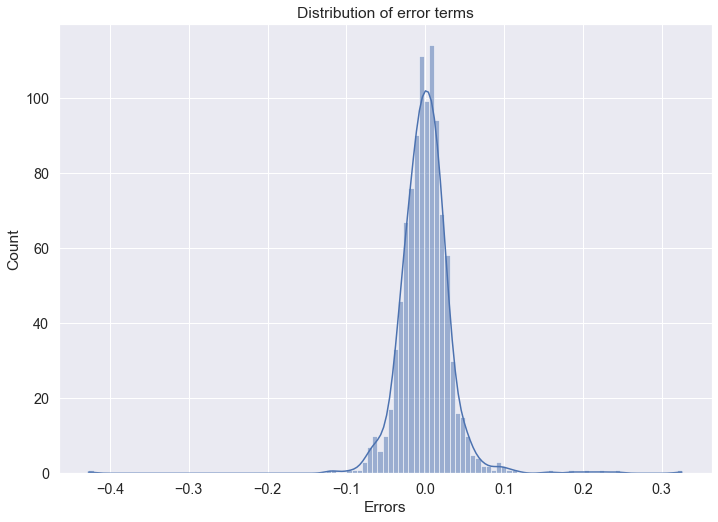

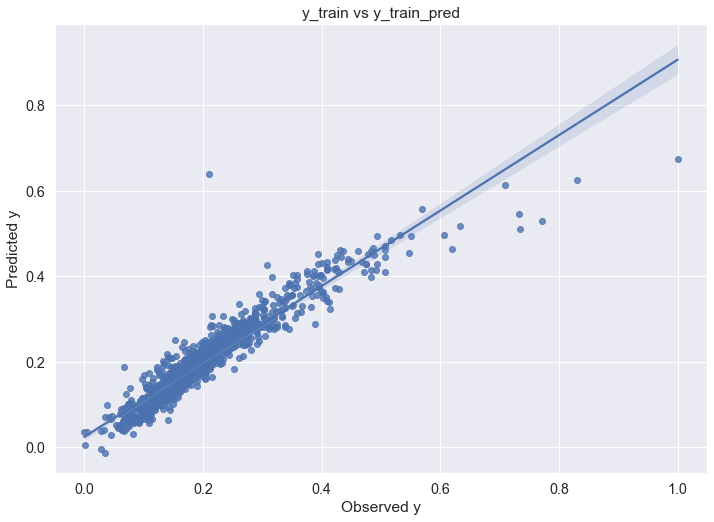

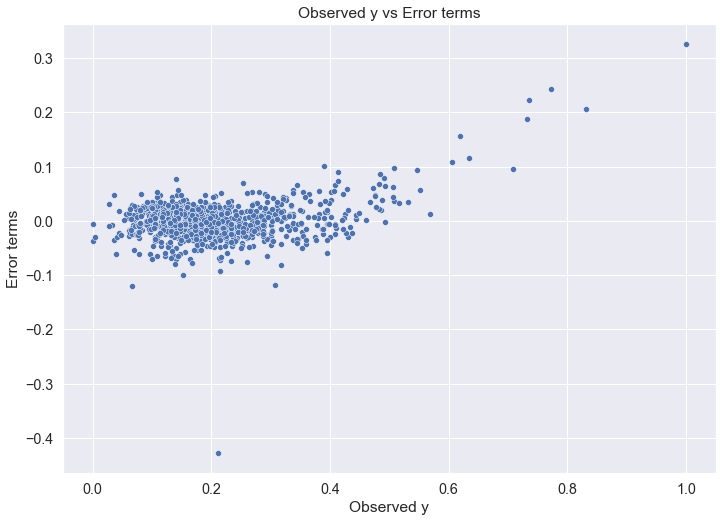

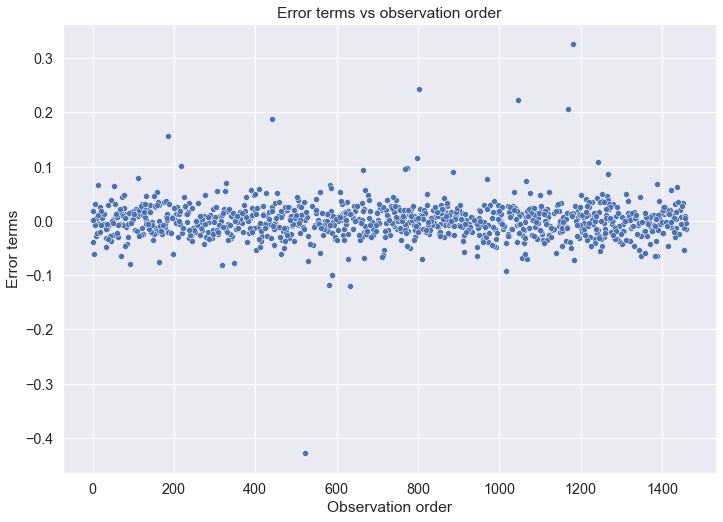

In [100]:
y_test = test['SalePrice']
X_test = test[(X_train.columns.to_list())]


y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)


print('R2 score of Lasso model:', r2_score(y_train, y_train_pred))


plt.show()
sns.histplot(y_train-y_train_pred, kde=True)
plt.title('Distribution of error terms')
plt.xlabel('Errors')
plt.show()
sns.regplot(x=y_train, y=y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('Observed y')
plt.ylabel('Predicted y')
plt.show()
sns.scatterplot(x=y_train, y=(y_train-y_train_pred))
plt.title('Observed y vs Error terms')
plt.ylabel('Error terms')
plt.xlabel('Observed y')
plt.show()
sns.scatterplot(x=y_train.index, y=(y_train-y_train_pred))
plt.title('Error terms vs observation order')
plt.ylabel('Error terms')
plt.xlabel('Observation order')
plt.show()

## IV. Conclusions

The results are super exciting! 
- The **baseline model**, the "manual" Linear Regression **does not overfit** and **generalizes quite well**. It performs nearly as good on the test set as on the train set (even too close, that indicates some instability in the model, most probably spliting the dataset with different random seed would result in different R2 scores for the same model). 
- The **Ridge and Lasso** models trained on the 20 features resulted by the RFE **dont't perform any better** than the baseline model. This is expected. On 'few' features the regularization can't show its real potential and added value. 
- The **super exciting models** are the **regularized models trained on the full feature set**. They clearly outperform the previous models. On all features the regularization sucessfully found the balance between high bias and high variance. 

The **Lasso outperforms Ridge** on both of the training and test sets. It was kind of expected as we had very **high number of features compared to the available data points**. Lasso - with its ability of zeroing out certain features - reduced model complexity but still captured the trend. Wow!

## V. Assignment questions

In this chapter we are going to find answers for the assigment questions.

### 1. Alpha Change
**Question**: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?


**Answer**

- The optimal alpha for Ridge is 7
- The optimal alpha for Lasso is 0.0001

#### Fitting ridge with double alpha and calculating the top 5 features

In [101]:
#Fitting Ridge model for alpha = 14 (double of the optimal) and printing coefficients which have been penalised
alpha = 14.0
ridge_double = Ridge(alpha=alpha)

ridge_double.fit(X_train, y_train)

Ridge(alpha=14.0)

In [102]:
train_test_evaluate(ridge_double)

Train R2: 
 0.8820167792019673 

Test R2: 
 0.8648798661066843 

Train RSS: 
 1.4208715272478831 

Test RSS: 
 0.8010947917306411 

Train MSE: 
 0.0014012539716448552 

Test MSE: 
 0.00184159722236929 



[0.8820167792019673,
 0.8648798661066843,
 1.4208715272478831,
 0.8010947917306411,
 0.0014012539716448552,
 0.00184159722236929]

**Answer**:

The model lost some of its predictive power.
- The R2 on training set went down from 0.892 to 0.882
- The R2 on test set went down from 0.873 to 0.865
obviously the model makes more errors (more biased):
- The - square root of - Mean Squared Error:
    - on the training set went up from 0.0357 to 0.0374
    - on the test set went up from 0.0416 to 0.0429

It is understanable as through higher alpha we penalize the model more for complexity that results in a simpler-than-optimal model that results in a more generic model that has more bias. 

In [103]:
feature_coeff_ridge_double = list(zip(ridge_double.feature_names_in_, ridge_double.coef_))

In [104]:
sorted(feature_coeff_ridge_double, key= lambda x: abs(x[1]), reverse=True)[:5]

[('OverallQual', 0.06380761336409506),
 ('GrLivArea', 0.05199586128731365),
 ('1stFlrSF', 0.045868340530310414),
 ('2ndFlrSF', 0.04217458283253517),
 ('TotRmsAbvGrd', 0.04178176024626338)]

**Answer**

The top 5 features are:
- Overall Quality
- Gross Living Area
- 1st Floor SF
- 2nd Floor SF
- Total Rooms Above Ground

#### Fitting lasso with double lambda and calculating the top 5 features

In [105]:
#Fitting Lasso model for alpha = 0.0002 (double of the optimal) and printing coefficients which have been penalised
alpha = 0.0002
lasso_double = Lasso(alpha=alpha)

lasso_double.fit(X_train, y_train)

Lasso(alpha=0.0002)

In [106]:
train_test_evaluate(lasso_double)

Train R2: 
 0.8897027125272401 

Test R2: 
 0.8800447423332818 

Train RSS: 
 1.328309858322942 

Test RSS: 
 0.7111858861343894 

Train MSE: 
 0.0013099702744802189 

Test MSE: 
 0.0016349100830675618 



[0.8897027125272401,
 0.8800447423332818,
 1.328309858322942,
 0.7111858861343894,
 0.0013099702744802189,
 0.0016349100830675618]

**Answer**

The model lost some of its predictive power but the change is not that significant (our alpha value is very low).
- The R2 on training set went down from 0.895 to 0.890
- The R2 on test set went down from 0.881 to 0.880
obviously the model makes more errors (more biased):
- The - square root of - Mean Squared Error:
    - on the training set went up from 0.0352 to 0.0362
    - on the test set went up from 0.0402 to 0.0404

It is understanable as through higher alpha we penalize the model more for complexity that results in a simpler-than-optimal model that results in a more generic model that is more biased. 

In [107]:
feature_coeff_lasso_double = list(zip(lasso_double.feature_names_in_, lasso_double.coef_))

In [108]:
sorted(feature_coeff_lasso_double, key= lambda x: abs(x[1]), reverse=True)[:5]

[('GrLivArea', 0.2571902371739583),
 ('OverallQual', 0.11552602471526913),
 ('Neighborhood_StoneBr', 0.06135791789345671),
 ('Neighborhood_NoRidge', 0.05176398115859989),
 ('Neighborhood_NridgHt', 0.04819515560855017)]

**Answer**

The top 5 features are:
- Gross Living Area
- Overall Quality
- Neighborhood_StoneBr
- Neighborhood_NoRidge
- Neighborhood_NridgHt

### 1. Top 5 coeffs

One of the questions is to list the top coefficients of the "winner" model. The best model is the Lasso trained on the full feature set. 

'Most important' is not defined by the question. Usually 'most important' feature is the one with the highest absolut coefficient. We go with this definition.

In [109]:
# Let's collect the features alongside with their coefficients 
feature_coeff_lasso_all = list(zip(lasso.feature_names_in_, ridge.coef_))

In [110]:
#We sort the list by the absolut value of the coefs in descending order 
#We show 10 here so that we can see the "next top 5" asű well for further analysis
sorted(feature_coeff_lasso_all, key= lambda x: abs(x[1]), reverse=True)[:10]

[('OverallQual', 0.0773304838568534),
 ('GrLivArea', 0.0636562459036646),
 ('2ndFlrSF', 0.05468131268308785),
 ('1stFlrSF', 0.05351376493376257),
 ('Neighborhood_StoneBr', 0.04814351479553987),
 ('BsmtFinSF1', 0.04567257997271492),
 ('TotRmsAbvGrd', 0.04476629210689748),
 ('Neighborhood_NoRidge', 0.04185403205261541),
 ('KitchenQual', 0.039658272900089),
 ('TotalBsmtSF', 0.03960386044278904)]

The top 5 features are:
- Overall Quality
- Gross Living Area
- 2nd Floor SF
- 1st Floor SF
- Neighborhood_StoneBr

According to the model the price is determined mainly by the quality, the size and the location of the property. Our intuition or 'expertal judgement' confirms this conclusion.

### 2. Top 5 coeffs after removing the original top 5 

Q3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [111]:
#Creating the top 5 list
top_five = list(sorted(feature_coeff_lasso_all, key= lambda x: x[1], reverse=True)[:5])
topfive_list = [i[0] for i in top_five]
topfive_list

['OverallQual', 'GrLivArea', '2ndFlrSF', '1stFlrSF', 'Neighborhood_StoneBr']

In [112]:
X_train.drop(topfive_list, axis=1, inplace=True)

In [113]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [114]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0001}


In [115]:
#Fitting Lasso model for alpha = 0.0001 and printing coefficients which have been penalised

alpha =0.0001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

In [116]:
metric_lasso_full = train_test_evaluate(lasso)

Train R2: 
 0.8726769069391184 

Test R2: 
 0.8525411956069767 

Train RSS: 
 1.5333515771791484 

Test RSS: 
 0.8742478029761788 

Train MSE: 
 0.0015121810425829866 

Test MSE: 
 0.0020097650643130546 



In [117]:
feature_coeff_lasso_wo5 = [i for i in zip(lasso.feature_names_in_, ridge.coef_)]

In [118]:
top_five = list(sorted(feature_coeff_lasso_wo5, key= lambda x: abs(x[1]), reverse=True)[:5])
topfive_list = [i[0] for i in top_five]
topfive_list

['OverallCond', 'HalfBath', 'FullBath', 'BsmtHalfBath', 'Condition1_PosA']

The top 5 features are:
- Overall Condition
- HalfBath
- FullBath
- BsmtHalfBath
- Condition1_PosA

Now this is amazing! We removed the variable Overall Quality. Its place is now taken by the Overall Condition that are both similar qualitative descriptors of a real estate!
We removed fieatures that express the size of the property. Their places are taken by the number of Half and Full Bathes. Again, the bigger the house the more bathrooms it has on average. So somehow again the predictors still reflect the size of the house. 

It tells the story that whatever the actual variable is, the price is influenced by:
- size
- quality
- locaton

And the above listed information can be obtained from different variables. 

## END